In [1]:
# example to extract monthly mean precipitation from ERA5 using the CDS

## Script adapted from : https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=form


import cdsapi

area=[44, -10, 36,3,]; area_name="IB" # area to extract, example for Iberian Peninsula 
years=[ yr for yr in range(1980,2023)] # list of years to extract, 1980 to 2022 
file_name_output='era5_monthly_precip%s.nc'%(area_name)  # file name to save 
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'format': 'netcdf',
        'product_type': 'monthly_averaged_reanalysis',
        'variable': 'total_precipitation',
        'year': years ,
        'month': [ im for im in range(1,13) ],
        'time': '00:00',
        'area': area,
    },
    file_name_output)

2023-05-09 10:53:06,962 INFO Welcome to the CDS
2023-05-09 10:53:06,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-05-09 10:53:07,159 INFO Request is completed
2023-05-09 10:53:07,161 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data8/adaptor.mars.internal-1683624840.955206-29778-12-005e9998-e76c-4233-a9c7-1a813351f03b.nc to era5_monthly_precipIB.nc (1.7M)
2023-05-09 10:53:07,962 INFO Download rate 2.2M/s                                                                      


Result(content_length=1808448,content_type=application/x-netcdf,location=https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data8/adaptor.mars.internal-1683624840.955206-29778-12-005e9998-e76c-4233-a9c7-1a813351f03b.nc)

In [2]:
# this is just to check the data
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline


ds = xr.open_dataset(file_name_output)
ds['tp'] = ds['tp']*1000 # convert from m/day to mm/day 
display(ds)

<xarray.Dataset>
Dimensions:    (longitude: 53, latitude: 33, time: 516)
Coordinates:
  * longitude  (longitude) float32 -10.0 -9.75 -9.5 -9.25 ... 2.25 2.5 2.75 3.0
  * latitude   (latitude) float32 44.0 43.75 43.5 43.25 ... 36.5 36.25 36.0
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    tp         (time, latitude, longitude) float32 3.495 3.616 ... 0.4501 0.5435
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-09 09:34:02 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

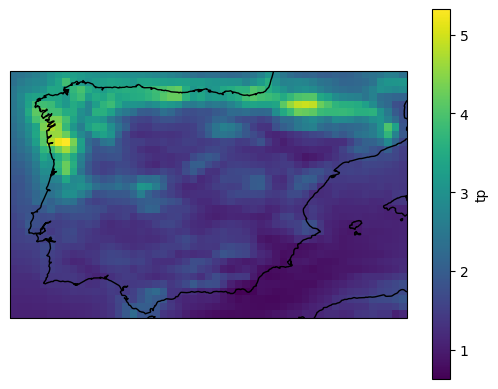

In [3]:
## plot map with temporal mean 
p=ds.mean(dim='time')['tp'].plot(transform=ccrs.PlateCarree(),subplot_kws={"projection": ccrs.PlateCarree()},)
p.axes.coastlines()

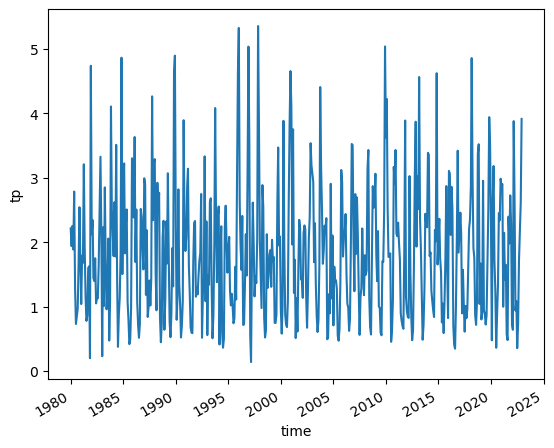

In [4]:
## plot temporal evolution, mean over the region
ds.mean(dim=['latitude','longitude'])['tp'].plot()

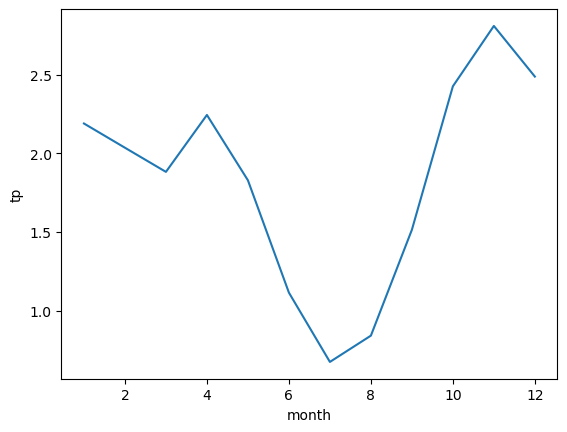

In [5]:
## plot mean diurnal cycle 
ds.mean(dim=['latitude','longitude'])['tp'].groupby('time.month').mean().plot()